In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from pprint import pprint

In [2]:
df = pd.read_csv('../results/ag_news_subset5-distilbert/opt/2020-12-09_18:49:38/opt_results_ag_news_subset5.csv')

In [3]:
df['n'] = df.param_embedding_extractor.map(lambda x: int(x[-2]))

In [4]:
df['extractor'] = df.param_embedding_extractor.map(lambda x: re.search(r'<function (.+?) ', x).group(1))

In [5]:
# Uncomment to exlude a family of runs which did not work at all
df = df[~(df.param_annealing_alphas == '[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]')]

In [6]:
df.shape

(480, 9)

In [41]:
pprint(df.sort_values(['accuracy', 'ari', 'nmi'], ascending=False).head(1).to_dict())

{'accuracy': {229: 0.8683385579937304},
 'ari': {229: 0.6870838318742025},
 'best_matching': {229: '{0: 1, 1: 2, 2: 3, 3: 0}'},
 'extractor': {229: 'concat_cls_n_hidden_states'},
 'n': {229: 2},
 'nmi': {229: 0.6519677304555203},
 'param_annealing_alphas': {229: '[1000. 1000. 1000. 1000. 1000. 1000. 1000. '
                                 '1000. 1000. 1000.]'},
 'param_clustering_loss_weight': {229: 1.0},
 'param_embedding_extractor': {229: 'functools.partial(<function '
                                    'concat_cls_n_hidden_states at '
                                    '0x7fb048539040>, n=2)'}}


In [45]:
top = df.sort_values(['accuracy', 'ari', 'nmi'], ascending=False).head(20)
top

,param_annealing_alphas,param_clustering_loss_weight,param_embedding_extractor,best_matching,accuracy,ari,nmi,n,extractor
229,[1000. 1000. 1000. 1000. 1000. 1000. 1000. 100...,1.0,functools.partial(<function concat_cls_n_hidde...,"{0: 1, 1: 2, 2: 3, 3: 0}",0.868339,0.687084,0.651968,2,concat_cls_n_hidden_states
52,[ 1. 2. 3. 4. 5. 6. 7. 8. 9. 10.],0.5,functools.partial(<function concat_cls_n_hidde...,"{0: 1, 1: 3, 2: 0, 3: 2}",0.865204,0.682562,0.653894,5,concat_cls_n_hidden_states
149,[1000. 1000. 1000. 1000. 1000. 1000. 1000. 100...,0.3,functools.partial(<function concat_cls_n_hidde...,"{0: 0, 1: 3, 2: 1, 3: 2}",0.865204,0.679371,0.649483,6,concat_cls_n_hidden_states
210,[1000. 1000. 1000. 1000. 1000. 1000. 1000. 100...,0.8,functools.partial(<function concat_mean_n_hidd...,"{0: 0, 1: 3, 2: 2, 3: 1}",0.862069,0.673072,0.639687,1,concat_mean_n_hidden_states
349,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],1.0,functools.partial(<function concat_cls_n_hidde...,"{0: 1, 1: 2, 2: 0, 3: 3}",0.858934,0.668971,0.637447,2,concat_cls_n_hidden_states
352,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],1.0,functools.partial(<function concat_cls_n_hidde...,"{0: 3, 1: 0, 2: 2, 3: 1}",0.858934,0.668720,0.641739,5,concat_cls_n_hidden_states
109,[ 1. 2. 3. 4. 5. 6. 7. 8. 9. 10.],1.0,functools.partial(<function concat_cls_n_hidde...,"{0: 1, 1: 2, 2: 3, 3: 0}",0.857367,0.667855,0.638040,2,concat_cls_n_hidden_states
38,[ 1. 2. 3. 4. 5. 6. 7. 8. 9. 10.],0.4,functools.partial(<function concat_cls_n_hidde...,"{0: 2, 1: 0, 2: 1, 3: 3}",0.857367,0.665686,0.637221,3,concat_cls_n_hidden_states
170,[1000. 1000. 1000. 1000. 1000. 1000. 1000. 100...,0.5,functools.partial(<function concat_cls_n_hidde...,"{0: 3, 1: 2, 2: 1, 3: 0}",0.855799,0.661693,0.634656,3,concat_cls_n_hidden_states
350,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],1.0,functools.partial(<function concat_cls_n_hidde...,"{0: 3, 1: 2, 2: 0, 3: 1}",0.855799,0.660729,0.630778,3,concat_cls_n_hidden_states


<AxesSubplot:ylabel='Frequency'>

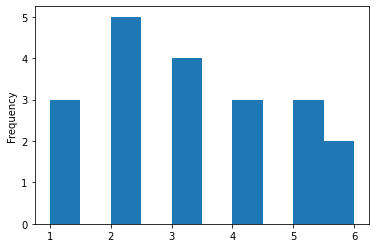

In [47]:
top.n.plot(kind='hist')

<AxesSubplot:>

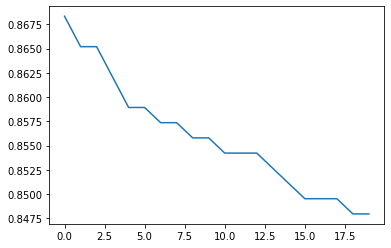

In [8]:
top.reset_index().accuracy.plot()

<AxesSubplot:>

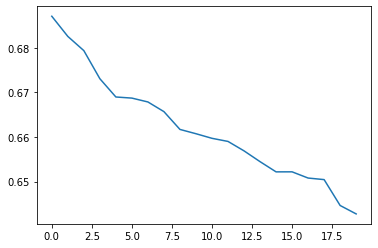

In [9]:
top.reset_index().ari.plot()

<AxesSubplot:>

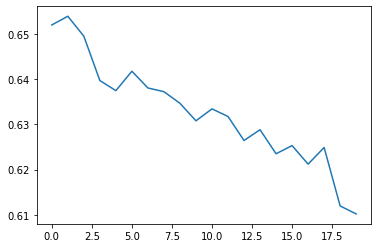

In [10]:
top.reset_index().nmi.plot()

In [11]:
low = df.sort_values(['accuracy', 'ari', 'nmi'], ascending=True).head(20)
low

,param_annealing_alphas,param_clustering_loss_weight,param_embedding_extractor,best_matching,accuracy,ari,nmi,n,extractor
288,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],0.5,functools.partial(<function concat_cls_n_hidde...,"{0: 0, 1: 1, 2: 3, 3: 2}",0.271160,-0.000374,0.005788,1,concat_cls_n_hidden_states
282,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],0.4,functools.partial(<function concat_mean_n_hidd...,"{0: 3, 1: 1, 2: 2, 3: 0}",0.272727,-0.001664,0.003709,1,concat_mean_n_hidden_states
366,[0.1 0.42320861 0.75156841 1.07797116 1...,0.1,functools.partial(<function concat_mean_n_hidd...,"{0: 0, 1: 2, 2: 1, 3: 3}",0.274295,-0.000679,0.029506,1,concat_mean_n_hidden_states
270,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],0.3,functools.partial(<function concat_mean_n_hidd...,"{0: 0, 1: 3, 2: 1, 3: 2}",0.274295,0.000000,0.000000,1,concat_mean_n_hidden_states
360,[0.1 0.42320861 0.75156841 1.07797116 1...,0.1,functools.partial(<function concat_cls_n_hidde...,"{0: 0, 1: 3, 2: 1, 3: 2}",0.274295,0.000000,0.000000,1,concat_cls_n_hidden_states
361,[0.1 0.42320861 0.75156841 1.07797116 1...,0.1,functools.partial(<function concat_cls_n_hidde...,"{0: 0, 1: 3, 2: 1, 3: 2}",0.274295,0.000000,0.000000,2,concat_cls_n_hidden_states
372,[0.1 0.42320861 0.75156841 1.07797116 1...,0.2,functools.partial(<function concat_cls_n_hidde...,"{0: 0, 1: 3, 2: 1, 3: 2}",0.274295,0.000000,0.000000,1,concat_cls_n_hidden_states
373,[0.1 0.42320861 0.75156841 1.07797116 1...,0.2,functools.partial(<function concat_cls_n_hidde...,"{0: 0, 1: 1, 2: 3, 3: 2}",0.274295,0.000000,0.000000,2,concat_cls_n_hidden_states
378,[0.1 0.42320861 0.75156841 1.07797116 1...,0.2,functools.partial(<function concat_mean_n_hidd...,"{0: 0, 1: 1, 2: 3, 3: 2}",0.274295,0.000000,0.000000,1,concat_mean_n_hidden_states
384,[0.1 0.42320861 0.75156841 1.07797116 1...,0.3,functools.partial(<function concat_cls_n_hidde...,"{0: 0, 1: 1, 2: 3, 3: 2}",0.274295,0.000000,0.000000,1,concat_cls_n_hidden_states


In [12]:
df.accuracy.describe()

count    480.000000
mean       0.627890
std        0.191405
min        0.271160
25%        0.512147
50%        0.688088
75%        0.791536
max        0.868339
Name: accuracy, dtype: float64

<AxesSubplot:>

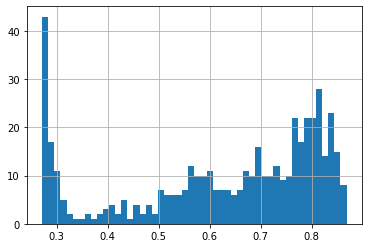

In [13]:
df.accuracy.hist(bins=50)

In [14]:
df.groupby('param_annealing_alphas').accuracy.describe()

,count,mean,std,min,25%,50%,75%,max
param_annealing_alphas,,,,,,,,
[ 1. 2. 3. 4. 5. 6. 7. 8. 9. 10.],120.0,0.686351,0.135310,0.283699,0.592476,0.711599,0.802900,0.865204
[0.1 0.42320861 0.75156841 1.07797116 1.40871101 1.74819141\n 2.09936739 2.46436829 2.84484834 3.24217832],120.0,0.421108,0.195003,0.274295,0.274295,0.300157,0.523903,0.854232
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],120.0,0.687526,0.143518,0.271160,0.610502,0.720219,0.799765,0.858934
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.],120.0,0.716575,0.111589,0.429467,0.643809,0.752351,0.804859,0.868339


In [15]:
df.groupby(
    [
        'param_clustering_loss_weight',
        'param_annealing_alphas',
        'n'
    ]
).accuracy.mean().argmax()

86

In [16]:
df.groupby(
    [
        'param_clustering_loss_weight',
        'param_annealing_alphas',
        'n'
    ]
).describe().iloc[df.groupby(
    [
        'param_clustering_loss_weight',
        'param_annealing_alphas',
        'n'
    ]
).accuracy.mean().argmax()]

accuracy  count    2.000000
          mean     0.836207
          std      0.003325
          min      0.833856
          25%      0.835031
          50%      0.836207
          75%      0.837382
          max      0.838558
ari       count    2.000000
          mean     0.621828
          std      0.009905
          min      0.614824
          25%      0.618326
          50%      0.621828
          75%      0.625330
          max      0.628832
nmi       count    2.000000
          mean     0.596158
          std      0.015327
          min      0.585321
          25%      0.590739
          50%      0.596158
          75%      0.601577
          max      0.606996
Name: (0.4, [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], 3), dtype: float64

<AxesSubplot:>

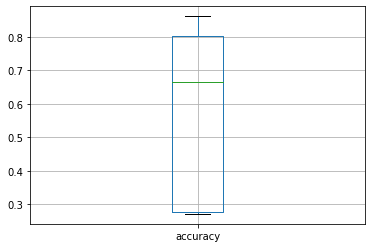

In [17]:
df[df['n']==1].boxplot('accuracy')

<AxesSubplot:xlabel='n', ylabel='accuracy'>

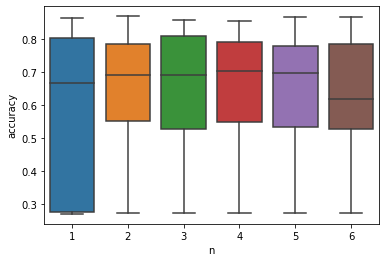

In [18]:
sns.boxplot(x='n', y='accuracy', data=df)

<AxesSubplot:xlabel='param_clustering_loss_weight', ylabel='accuracy'>

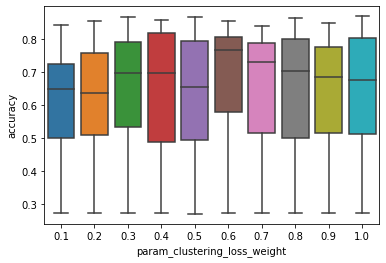

In [19]:
sns.boxplot(x='param_clustering_loss_weight', y='accuracy', data=df)

[Text(0, 0, '[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]'),
 Text(1, 0, '[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]'),
 Text(2, 0, '[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]'),
 Text(3, 0, '[0.1        0.42320861 0.75156841 1.07797116 1.40871101 1.74819141\n 2.09936739 2.46436829 2.84484834 3.24217832]')]

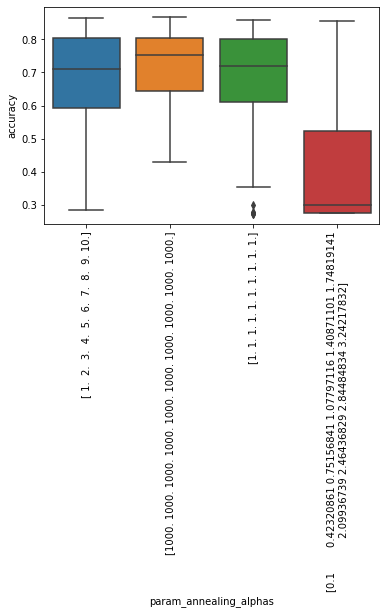

In [20]:
g = sns.boxplot(x='param_annealing_alphas', y='accuracy', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

<AxesSubplot:xlabel='extractor', ylabel='accuracy'>

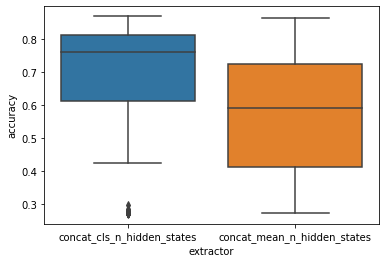

In [21]:
sns.boxplot(x='extractor', y='accuracy', data=df)

In [22]:
for param in ['param_annealing_alphas', 'param_clustering_loss_weight', 'n', 'extractor']:
    best_mean = df[param].unique()[df.groupby(param).accuracy.mean().argmax()]
    print(f'{param}: {best_mean}')

param_annealing_alphas: [0.1        0.42320861 0.75156841 1.07797116 1.40871101 1.74819141
 2.09936739 2.46436829 2.84484834 3.24217832]
param_clustering_loss_weight: 0.6
n: 5
extractor: concat_cls_n_hidden_states


In [23]:
for param in [c for c in df.columns if c.startswith('param')] + ['n']:
    print(df.groupby(param).describe().iloc[
        df.groupby(param).describe().accuracy.mean().argmax()
    ])


param_clustering_loss_weight  count    120.000000
                              mean       0.550000
                              std        0.288432
                              min        0.100000
                              25%        0.300000
                              50%        0.550000
                              75%        0.800000
                              max        1.000000
accuracy                      count    120.000000
                              mean       0.686351
                              std        0.135310
                              min        0.283699
                              25%        0.592476
                              50%        0.711599
                              75%        0.802900
                              max        0.865204
ari                           count    120.000000
                              mean       0.442291
                              std        0.159737
                              min        0.001814


<AxesSubplot:xlabel='accuracy', ylabel='nmi'>

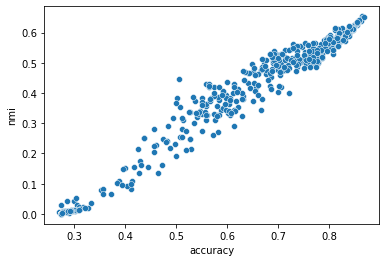

In [24]:
sns.scatterplot(x='accuracy', y='nmi', data=df)

<AxesSubplot:xlabel='accuracy', ylabel='ari'>

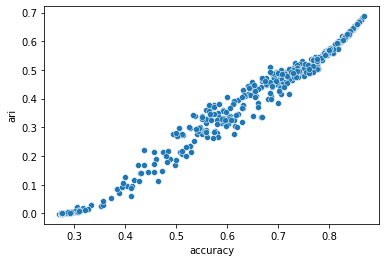

In [25]:
sns.scatterplot(x='accuracy', y='ari', data=df)

<AxesSubplot:xlabel='param_clustering_loss_weight', ylabel='accuracy'>

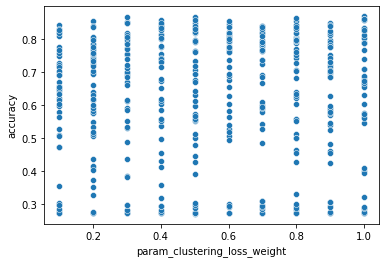

In [26]:
sns.scatterplot(x='param_clustering_loss_weight', y='accuracy', data=df)

In [27]:
df.groupby('n').describe()

param_clustering_loss_weight                                           \
                         count  mean      std  min  25%   50%  75%  max   
n                                                                         
1                         80.0  0.55  0.28904  0.1  0.3  0.55  0.8  1.0   
2                         80.0  0.55  0.28904  0.1  0.3  0.55  0.8  1.0   
3                         80.0  0.55  0.28904  0.1  0.3  0.55  0.8  1.0   
4                         80.0  0.55  0.28904  0.1  0.3  0.55  0.8  1.0   
5                         80.0  0.55  0.28904  0.1  0.3  0.55  0.8  1.0   
6                         80.0  0.55  0.28904  0.1  0.3  0.55  0.8  1.0   

  accuracy            ...       ari             nmi                           \
     count      mean  ...       75%       max count      mean       std  min   
n                     ...                                                      
1     80.0  0.581426  ...  0.566743  0.673072  80.0  0.344358  0.251375  0.0   
2     80.0  0.631642  ...  0.539872  0.687084  80.0  0.403880  0.212231  0.0   
3     80.0  0.634248  ...  0.573642  0.665686  80.0  0.397458  0.216313  0.0   
4     80.0  0.642065  ...  0.562248  0.659698  80.0  0.403163  0.205007  0.0   
5     80.0  0.646669  ...  0.531039  0.682562  80.0  0.408177  0.183223  0.0   
6     80.0  0.631289  ...  0.534861  0.679371  80.0  0.386396  0.174395  0.0   

                                           
        25%       50%       75%       max  
n                                          
1  0.019130  0.472008  0.556616  0.639687  
2  0.340779  0.493691  0.548848  0.651968  
3  0.327529  0.484068  0.565493  0.637221  
4  0.314847  0.490787  0.568623  0.633420  
5  0.309609  0.485651  0.539056  0.653894  
6  0.280997  0.396441  0.534038  0.649483  

[6 rows x 32 columns]

In [28]:
df[(df['n']==1)&(df['param_clustering_loss_weight']==1.0)]

,param_annealing_alphas,param_clustering_loss_weight,param_embedding_extractor,best_matching,accuracy,ari,nmi,n,extractor
108,[ 1. 2. 3. 4. 5. 6. 7. 8. 9. 10.],1.0,functools.partial(<function concat_cls_n_hidde...,"{0: 1, 1: 0, 2: 3, 3: 2}",0.686520,0.410731,0.453452,1,concat_cls_n_hidden_states
114,[ 1. 2. 3. 4. 5. 6. 7. 8. 9. 10.],1.0,functools.partial(<function concat_mean_n_hidd...,"{0: 1, 1: 3, 2: 0, 3: 2}",0.666144,0.438936,0.475197,1,concat_mean_n_hidden_states
228,[1000. 1000. 1000. 1000. 1000. 1000. 1000. 100...,1.0,functools.partial(<function concat_cls_n_hidde...,"{0: 1, 1: 2, 2: 0, 3: 3}",0.575235,0.378103,0.419263,1,concat_cls_n_hidden_states
234,[1000. 1000. 1000. 1000. 1000. 1000. 1000. 100...,1.0,functools.partial(<function concat_mean_n_hidd...,"{0: 3, 1: 0, 2: 2, 3: 1}",0.802508,0.566512,0.549619,1,concat_mean_n_hidden_states
348,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],1.0,functools.partial(<function concat_cls_n_hidde...,"{0: 1, 1: 3, 2: 2, 3: 0}",0.708464,0.485688,0.530240,1,concat_cls_n_hidden_states
354,[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.],1.0,functools.partial(<function concat_mean_n_hidd...,"{0: 1, 1: 0, 2: 3, 3: 2}",0.667712,0.473116,0.512752,1,concat_mean_n_hidden_states
468,[0.1 0.42320861 0.75156841 1.07797116 1...,1.0,functools.partial(<function concat_cls_n_hidde...,"{0: 0, 1: 1, 2: 3, 3: 2}",0.274295,0.000000,0.000000,1,concat_cls_n_hidden_states
474,[0.1 0.42320861 0.75156841 1.07797116 1...,1.0,functools.partial(<function concat_mean_n_hidd...,"{0: 2, 1: 3, 2: 1, 3: 0}",0.275862,0.000132,0.003256,1,concat_mean_n_hidden_states


In [29]:
df.groupby(['n', 'extractor', 'param_annealing_alphas'])[['accuracy', 'param_clustering_loss_weight']].corr(method="pearson").to_csv('temp.csv')

In [30]:
df.param_annealing_alphas.dtype

dtype('O')

In [31]:
import numpy as np
mu, sigma = 2e-5, 0.0001
s = np.random.normal(mu, sigma, 1000)

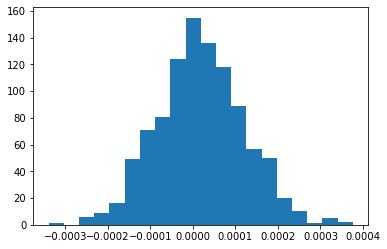

In [32]:
count, bins, ignored = plt.hist(s, 20)

In [33]:
def psoftmin(x, alpha=1):
    exp = np.exp(-alpha * x)
    return exp/np.sum(exp)

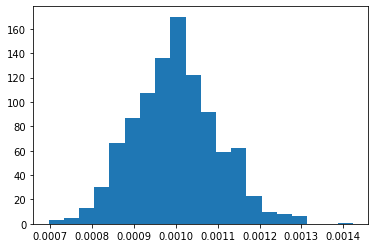

In [34]:
count, bins, ignored = plt.hist(psoftmin(s, alpha=1000), 20)

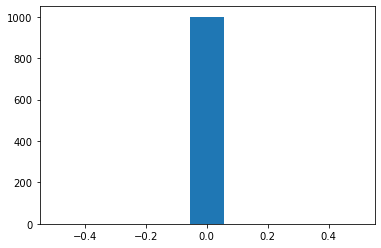

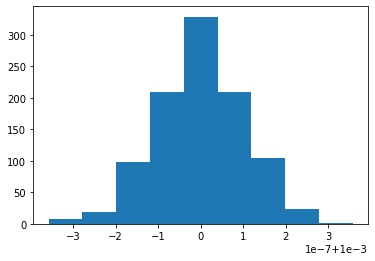

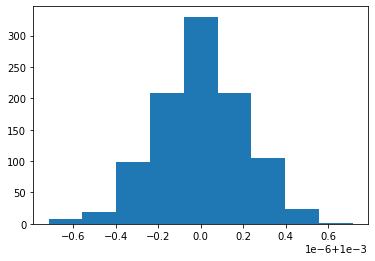

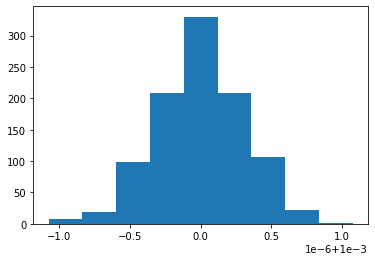

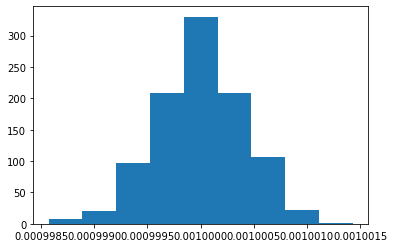

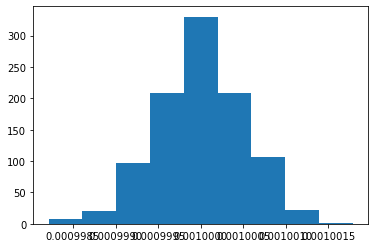

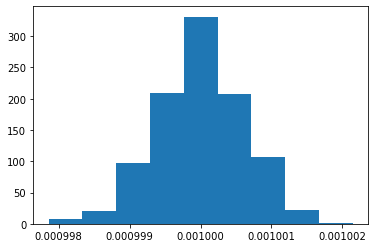

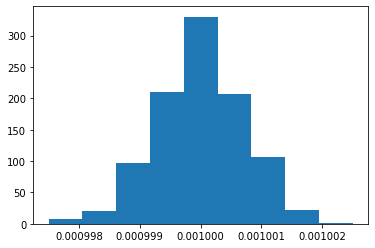

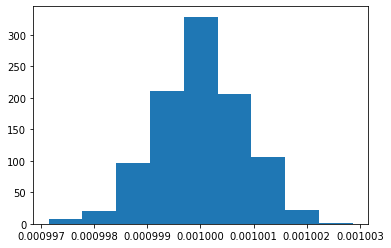

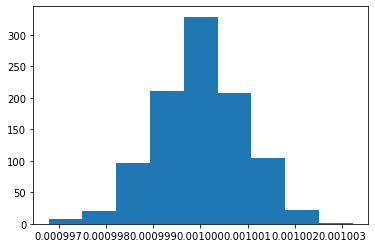

In [35]:
for i in range(10):
    plt.hist(psoftmin(s, alpha=i), bins=9)
    plt.show()